In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore
from scipy.signal import argrelextrema

## Positive Bias Voltage 440 

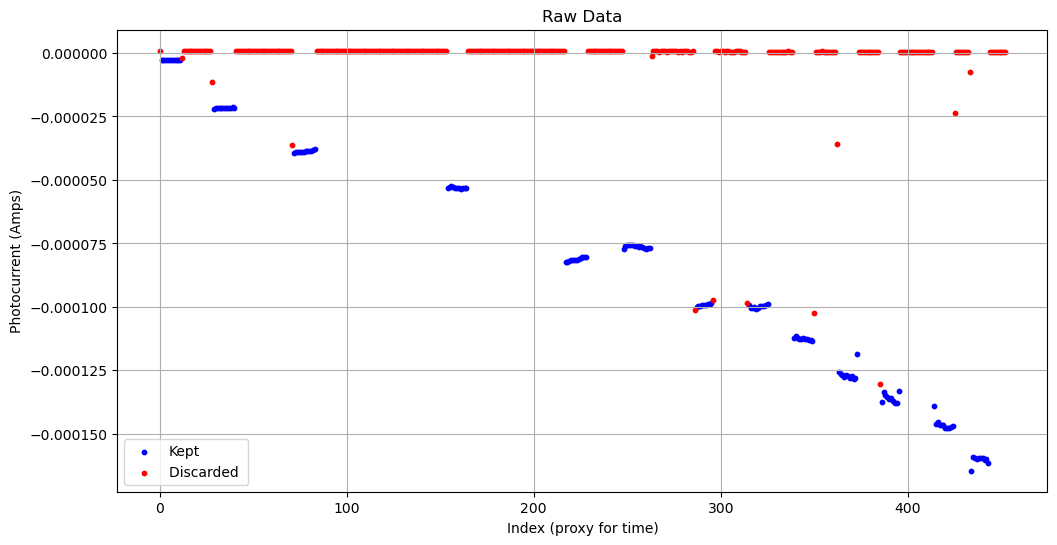

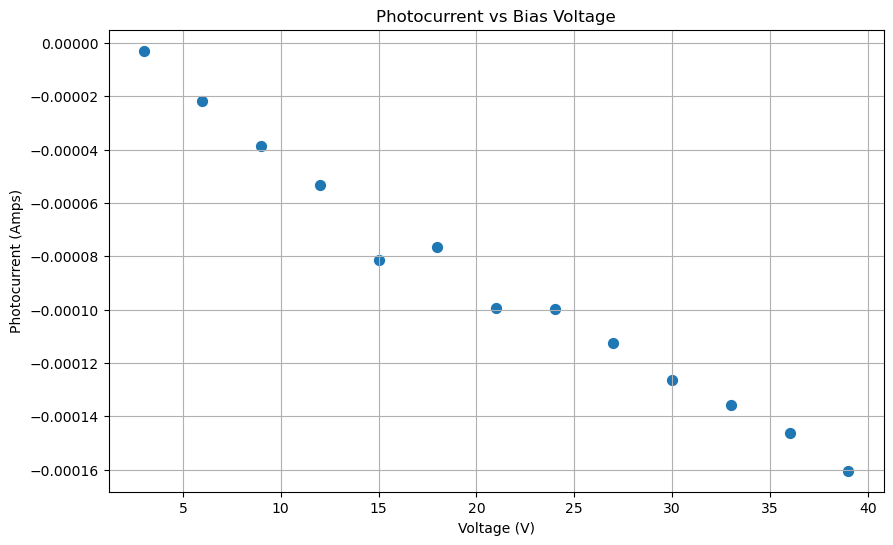

In [13]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentPositiveVoltage/PosBiasVoltage_Inc3_440_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])
voltages = 3 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

# --- Plot 1: Raw data with kept/discarded points ---
plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded ')
plt.title('Raw Data')
plt.xlabel('Index (proxy for time)')
plt.ylabel('Photocurrent (Amps)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot 2: Final cluster averages ---
plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Photocurrent vs Bias Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (Amps)')
plt.grid(True)
plt.show()

## Postitive Bias Voltage 635

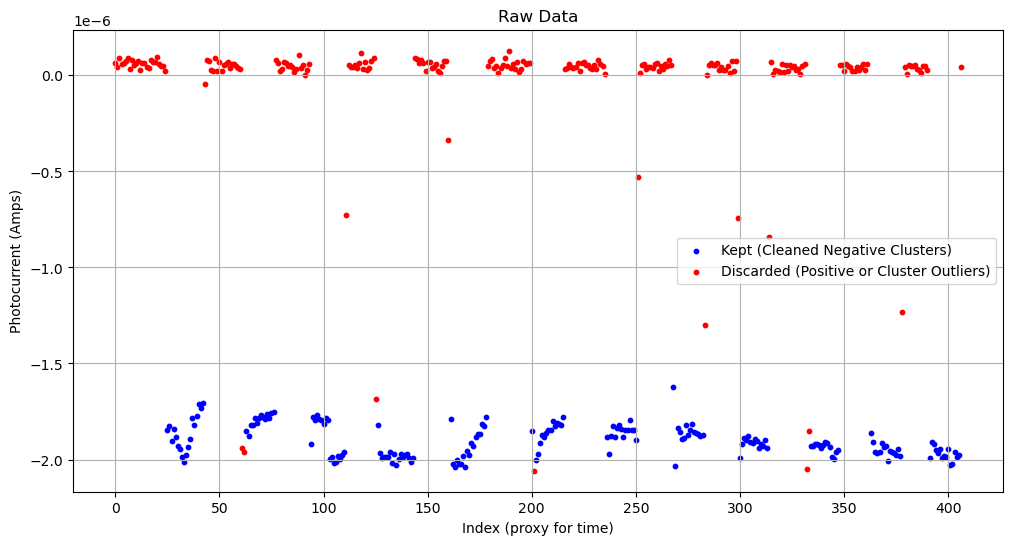

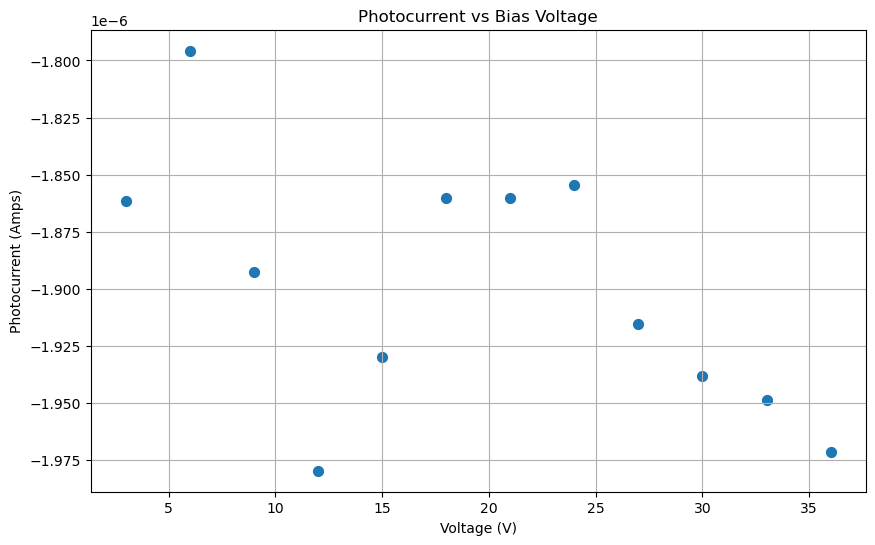

In [24]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentPositiveVoltage/PosBiasVoltage_Inc3_635_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])
voltages = 3 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data')
plt.xlabel('Index (proxy for time)')
plt.ylabel('Photocurrent (Amps)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Photocurrent vs Bias Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (Amps)')
plt.grid(True)
plt.show()

## Postitive Bias Voltage 440 Reduced Intensity

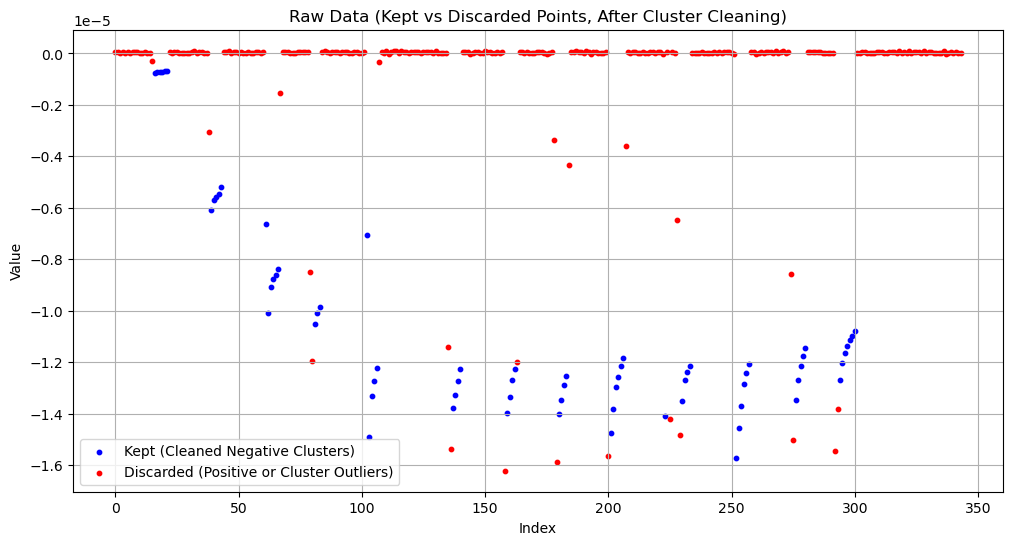

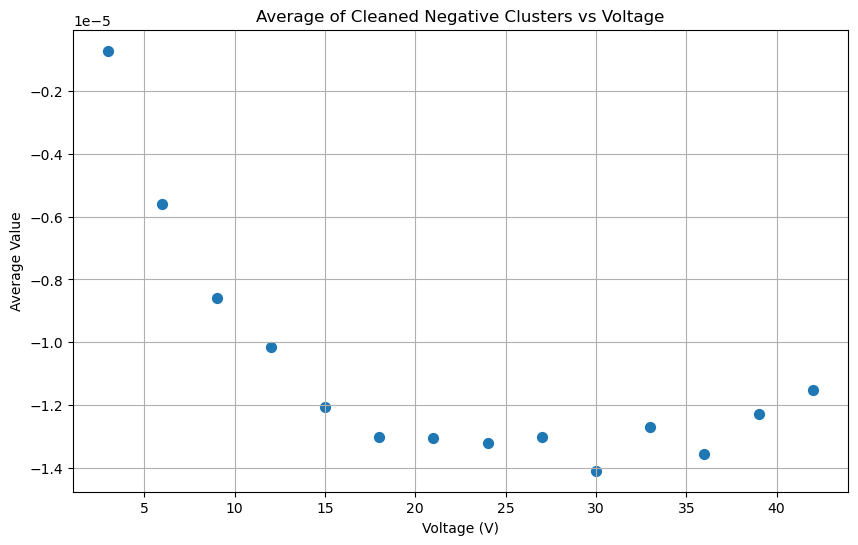

In [28]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentPositiveVoltage/PosBiasVoltage_Inc3_440RI_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) <  std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])
voltages = 3 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data (Kept vs Discarded Points, After Cluster Cleaning)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Average of Cleaned Negative Clusters vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

## Postitive Bias Voltage 635 Reduced Intensity

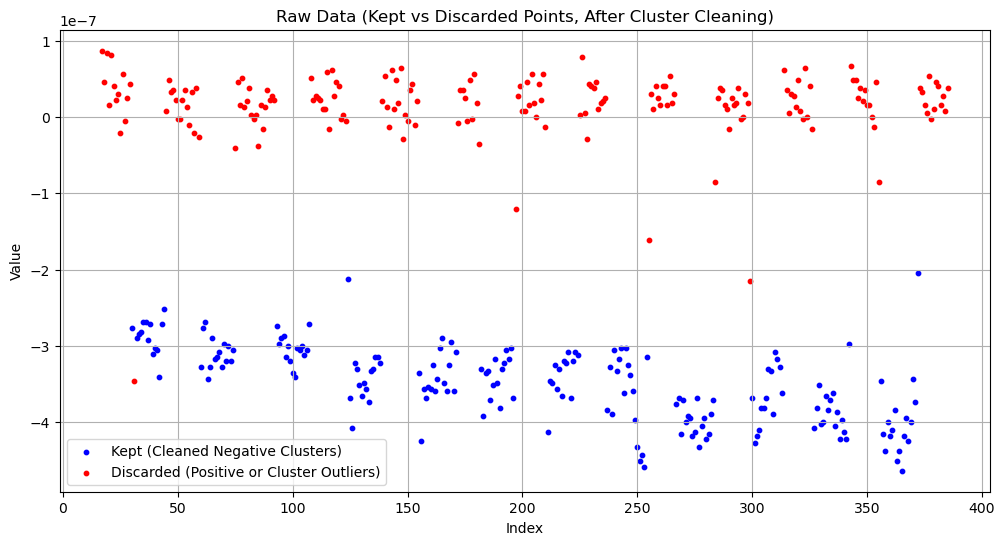

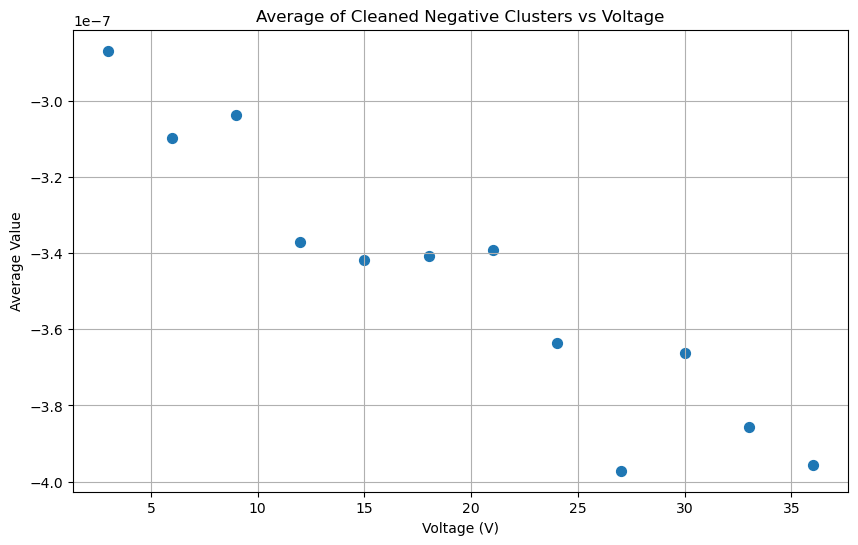

In [33]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentPositiveVoltage/PosBiasVoltage_Inc3_635RI_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])
voltages = 3 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data (Kept vs Discarded Points, After Cluster Cleaning)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Average of Cleaned Negative Clusters vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

## Negative Bias Voltage 440 

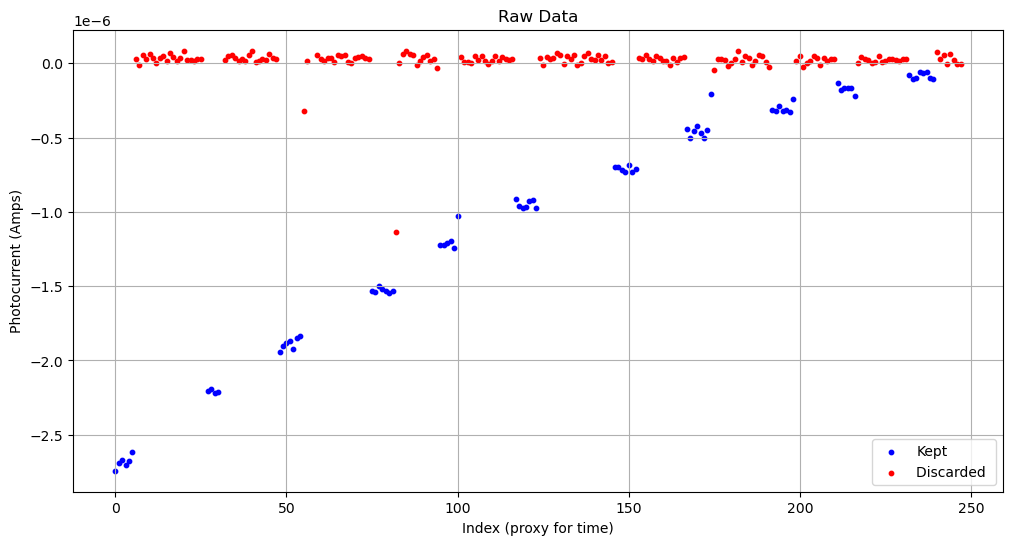

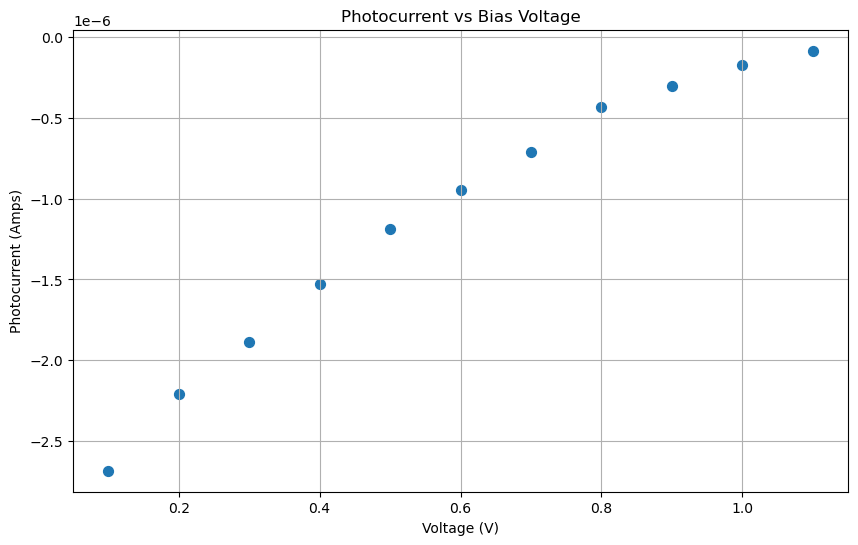

In [179]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentNegativeVoltage/NegBiasVoltage_Inc0.1_440_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])

# Voltage increments: 0.1, 0.2, 0.3, ...
voltages = 0.1 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded ')
plt.title('Raw Data')
plt.xlabel('Index (proxy for time)')
plt.ylabel('Photocurrent (Amps)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Photocurrent vs Bias Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Photocurrent (Amps)')
plt.grid(True)
plt.show()

In [183]:
cluster_averages

array([-2.68415000e-06, -2.20630000e-06, -1.88615714e-06, -1.52841429e-06,
       -1.18506667e-06, -9.47285714e-07, -7.11114286e-07, -4.31250000e-07,
       -3.03914286e-07, -1.72183333e-07, -8.42750000e-08])

## Negative Bias Voltage 635 

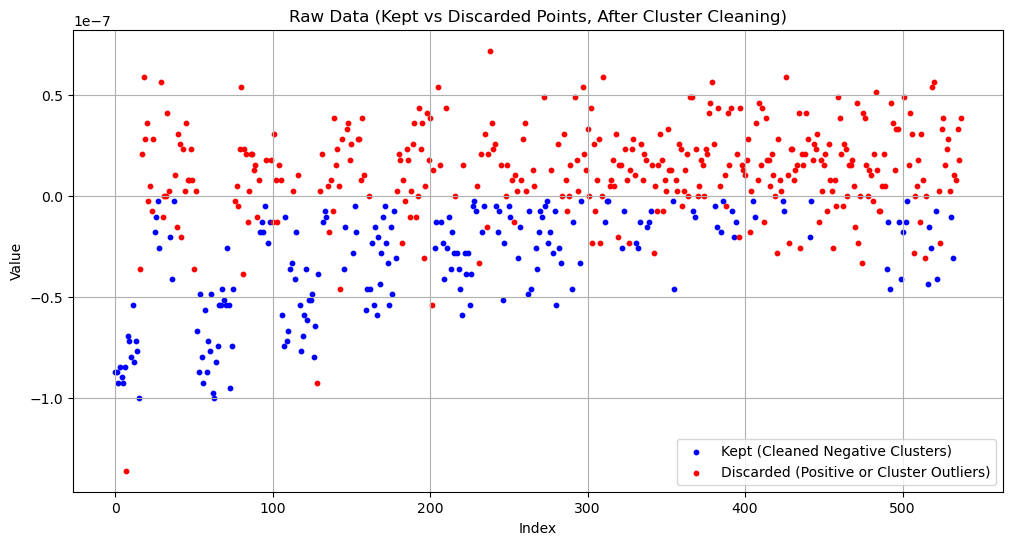

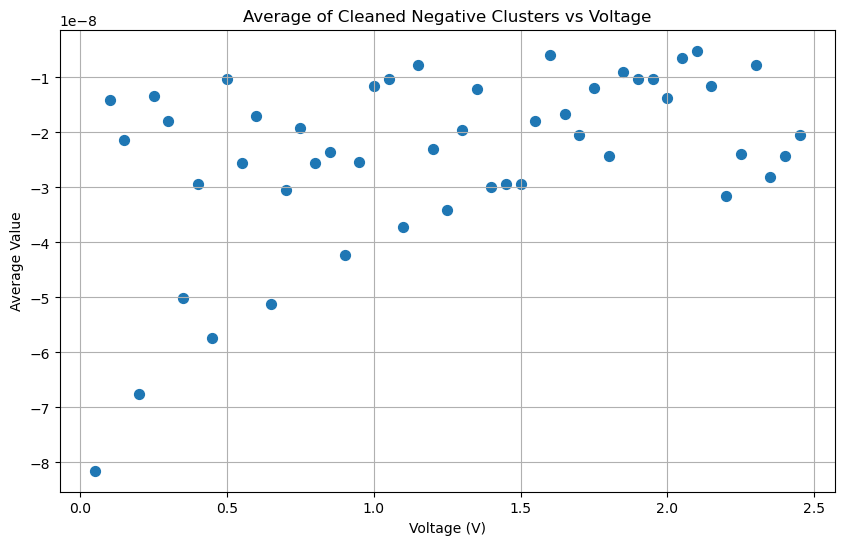

In [40]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentNegativeVoltage/NegBiasVoltage_Inc0.05_635BETR_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])

# Voltage increments: 0.1, 0.2, 0.3, ...
voltages = 0.05 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data (Kept vs Discarded Points, After Cluster Cleaning)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Average of Cleaned Negative Clusters vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

## Negative Bias Voltage 440 Reduced Intensity

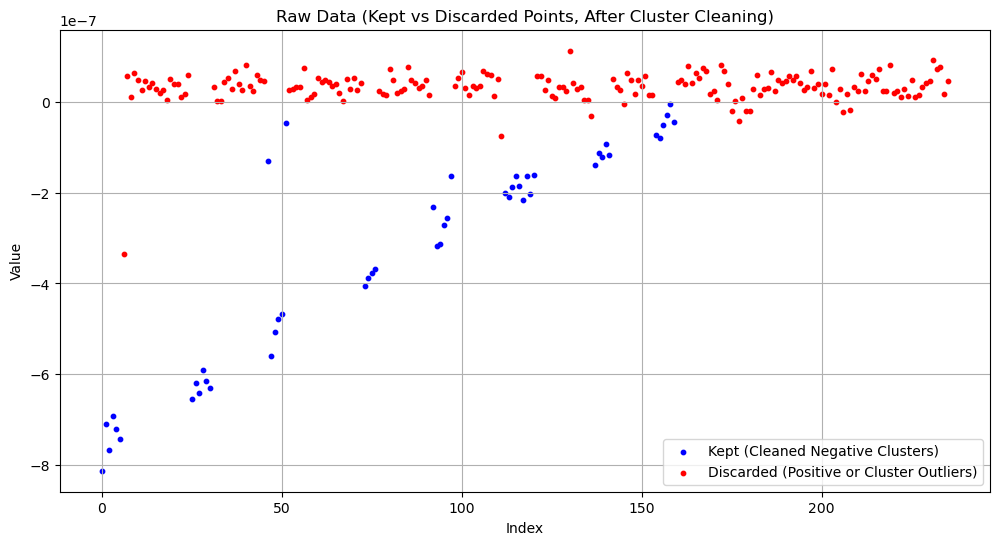

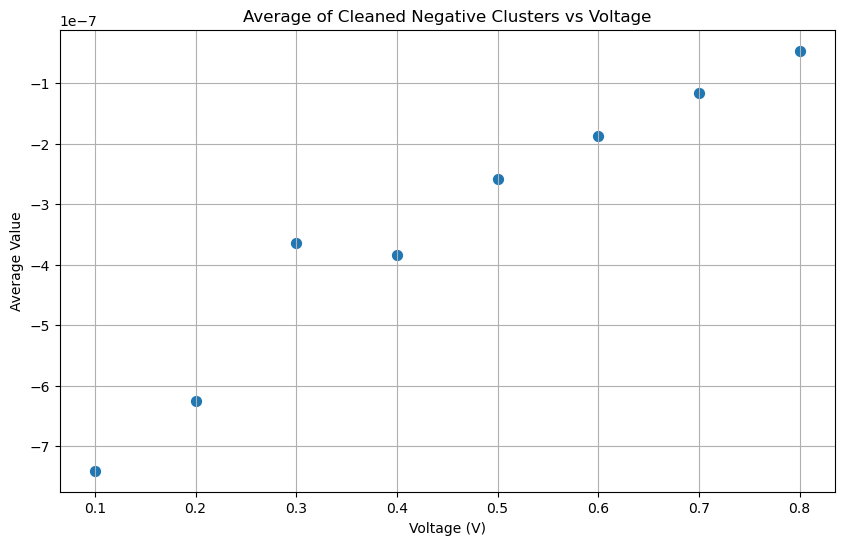

In [44]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentNegativeVoltage/NegBiasVoltage_Inc0.1_440RI_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) < 2 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])

voltages = 0.1 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data (Kept vs Discarded Points, After Cluster Cleaning)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Average of Cleaned Negative Clusters vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

## Negative Bias Voltage 635 Reduced Intensity

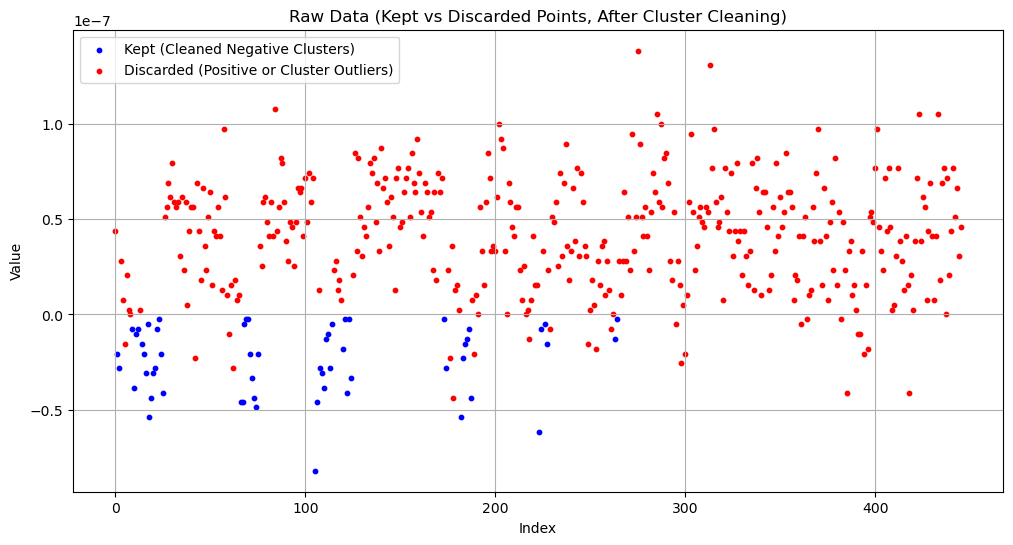

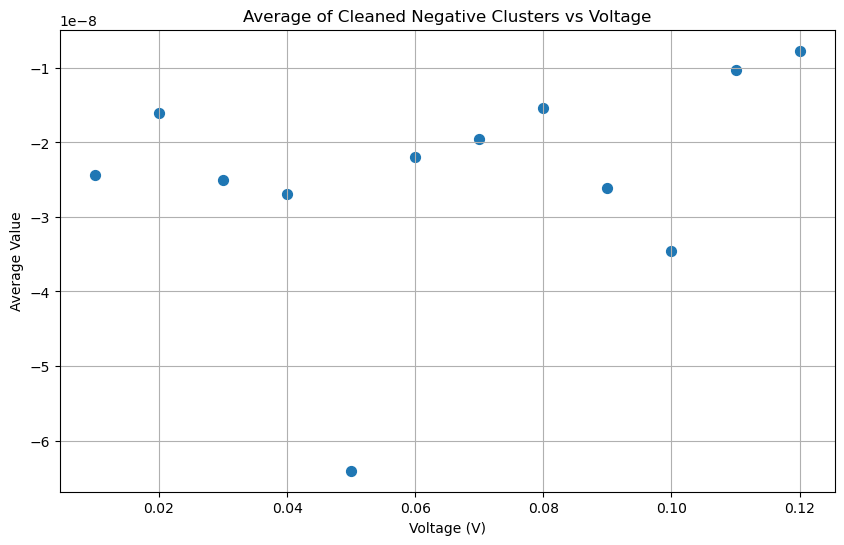

In [47]:
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/PhotoCurrentNegativeVoltage/NegBiasVoltage_Inc0.01_635RI_MARIE.xlsx')
raw_pos440 = df.iloc[:, 1].values

negative_clusters = []
cluster_indices = []
current_cluster = []
current_indices = []

for i, val in enumerate(raw_pos440):
    if val < 0:
        current_cluster.append(val)
        current_indices.append(i)
    else:
        if current_cluster:
            negative_clusters.append(np.array(current_cluster))
            cluster_indices.append(np.array(current_indices))
            current_cluster = []
            current_indices = []
if current_cluster:
    negative_clusters.append(np.array(current_cluster))
    cluster_indices.append(np.array(current_indices))

cleaned_clusters = []
cleaned_indices = []

for cluster, indices in zip(negative_clusters, cluster_indices):
    if len(cluster) < 2:
        continue  # skip tiny clusters
    mean = np.mean(cluster)
    std = np.std(cluster)
    # Remove points beyond 2 std from mean
    mask = np.abs(cluster - mean) <31 * std
    cleaned_cluster = cluster[mask]
    cleaned_index = indices[mask]
    if len(cleaned_cluster) > 0:
        cleaned_clusters.append(cleaned_cluster)
        cleaned_indices.append(cleaned_index)

cluster_averages = np.array([np.mean(cluster) for cluster in cleaned_clusters])

voltages = 0.01 * (np.arange(len(cluster_averages)) + 1)

keep_mask = np.full(raw_pos440.shape, False)
for indices in cleaned_indices:
    keep_mask[indices] = True

plt.figure(figsize=(12, 6))
plt.scatter(np.arange(len(raw_pos440))[keep_mask], raw_pos440[keep_mask], s=10, color='blue', label='Kept (Cleaned Negative Clusters)')
plt.scatter(np.arange(len(raw_pos440))[~keep_mask], raw_pos440[~keep_mask], s=10, color='red', label='Discarded (Positive or Cluster Outliers)')
plt.title('Raw Data (Kept vs Discarded Points, After Cluster Cleaning)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(voltages, cluster_averages, s=50)
plt.title('Average of Cleaned Negative Clusters vs Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()

## Voltages

## RCA929_445nm

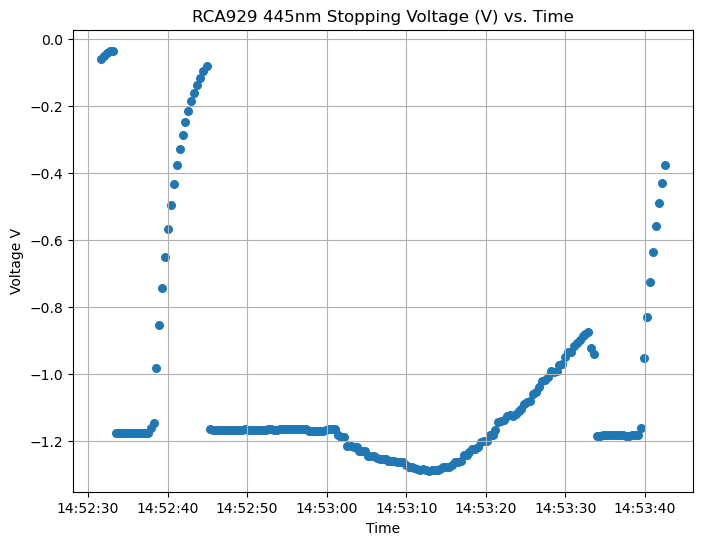

In [53]:
#RCA929_445nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/RCA929_445nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=30)
plt.title('RCA929 445nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


Local Minima:
Index: 5, X: 2025-04-30 14:52:33.508000, Y: -1.175855
Index: 12, X: 2025-04-30 14:52:36.072000, Y: -1.1770646
Index: 16, X: 2025-04-30 14:52:37.526000, Y: -1.1775832
Index: 40, X: 2025-04-30 14:52:46.498000, Y: -1.167841
Index: 43, X: 2025-04-30 14:52:47.588000, Y: -1.1678877
Index: 47, X: 2025-04-30 14:52:49.042000, Y: -1.1663052
Index: 50, X: 2025-04-30 14:52:50.132000, Y: -1.1662359
Index: 53, X: 2025-04-30 14:52:51.222000, Y: -1.1665935
Index: 56, X: 2025-04-30 14:52:52.313000, Y: -1.1668243
Index: 59, X: 2025-04-30 14:52:53.403000, Y: -1.166153
Index: 63, X: 2025-04-30 14:52:54.857000, Y: -1.1650194
Index: 65, X: 2025-04-30 14:52:55.584000, Y: -1.1653721
Index: 74, X: 2025-04-30 14:52:58.856000, Y: -1.1704895
Index: 76, X: 2025-04-30 14:52:59.583000, Y: -1.1690098
Index: 89, X: 2025-04-30 14:53:04.482000, Y: -1.2308347
Index: 92, X: 2025-04-30 14:53:05.572000, Y: -1.2453622
Index: 95, X: 2025-04-30 14:53:06.663000, Y: -1.2545382
Index: 102, X: 2025-04-30 14:53:09.207

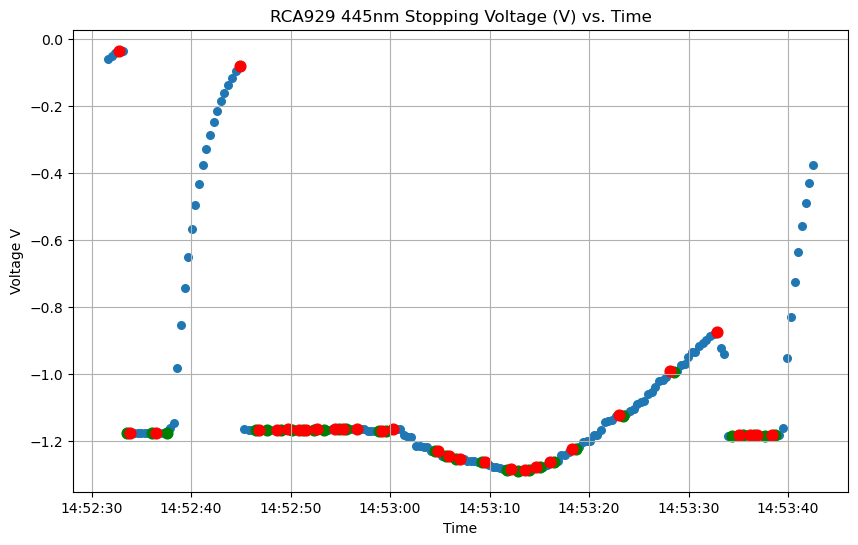

In [55]:
#RCA929_445nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/RCA929_445nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')

plt.title('RCA929 445nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()

In [57]:
maxstopping_RCA_445=-1.2887907
fullintensity_RCA_445=-1.1824084

## RCA929_635nm

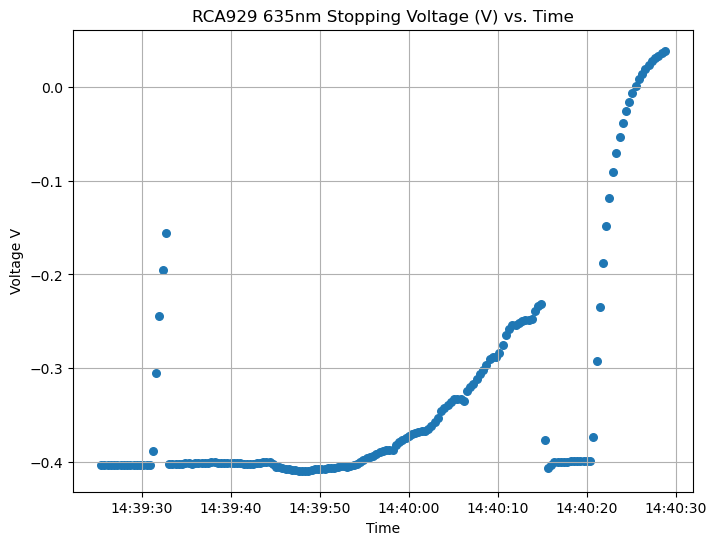

In [60]:
#RCA929_635nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/RCA929_635nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=30)
plt.title('RCA929 635nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


Local Minima:
Index: 2, X: 2025-04-30 14:39:26.187000, Y: -0.40368439
Index: 7, X: 2025-04-30 14:39:28.004000, Y: -0.40365854
Index: 21, X: 2025-04-30 14:39:33.093000, Y: -0.40261247
Index: 23, X: 2025-04-30 14:39:33.820000, Y: -0.40250553
Index: 28, X: 2025-04-30 14:39:35.638000, Y: -0.40197955
Index: 32, X: 2025-04-30 14:39:37.093000, Y: -0.40117036
Index: 41, X: 2025-04-30 14:39:40.364000, Y: -0.40159343
Index: 45, X: 2025-04-30 14:39:41.818000, Y: -0.40291241
Index: 54, X: 2025-04-30 14:39:45.090000, Y: -0.40617701
Index: 57, X: 2025-04-30 14:39:46.180000, Y: -0.40785782
Index: 63, X: 2025-04-30 14:39:48.360000, Y: -0.4096415
Index: 76, X: 2025-04-30 14:39:53.086000, Y: -0.40515889
Index: 90, X: 2025-04-30 14:39:58.176000, Y: -0.38727027
Index: 112, X: 2025-04-30 14:40:06.172000, Y: -0.33540535
Index: 128, X: 2025-04-30 14:40:11.989000, Y: -0.25455965
Index: 138, X: 2025-04-30 14:40:15.624000, Y: -0.40686424
Index: 142, X: 2025-04-30 14:40:17.077000, Y: -0.40048103
Index: 150, X: 2

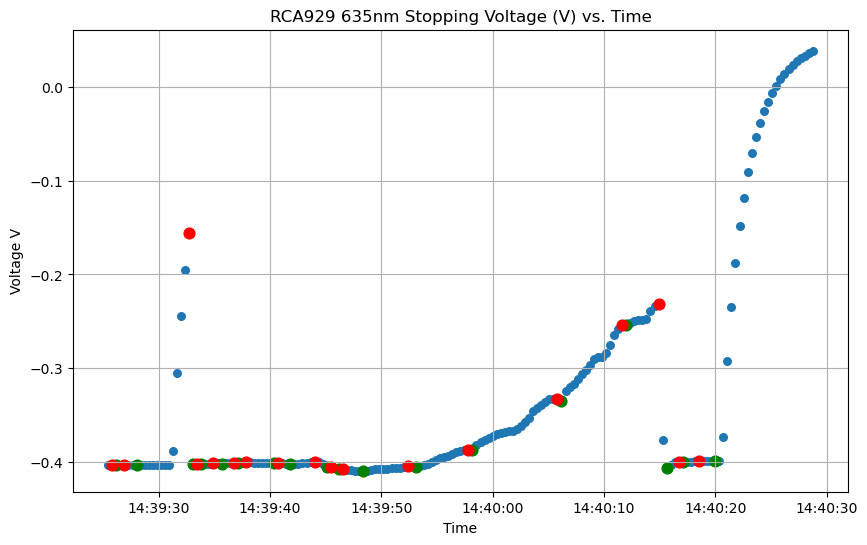

In [62]:
#RCA929_635nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/RCA929_635nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')

plt.title('RCA929 635nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()

In [64]:
maxstopping_RCA_635=-0.4096415

fullintensity_RCA_635=-0.4005048

## K_445nm BAD DATA

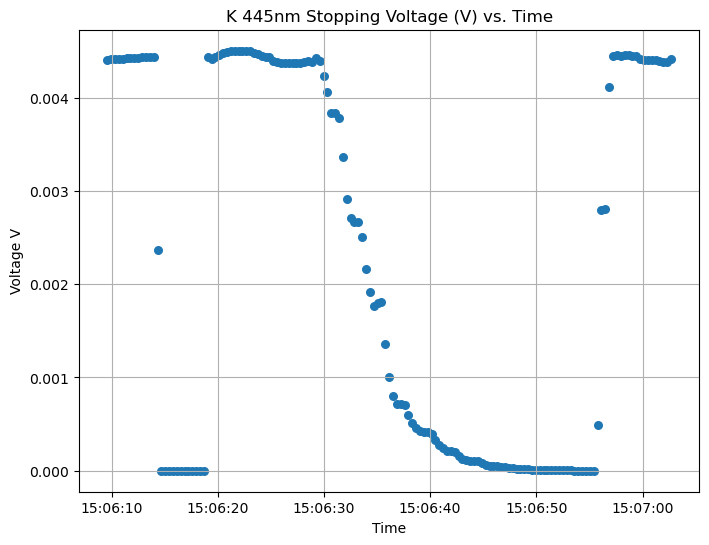

In [67]:
#K_445nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K_445nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=30)
plt.title('K 445nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


Local Minima:
Index: 17, X: 2025-04-30 15:06:15.781000, Y: -1.661e-06
Index: 20, X: 2025-04-30 15:06:16.871000, Y: -1.674e-06
Index: 23, X: 2025-04-30 15:06:17.962000, Y: -1.844e-06
Index: 27, X: 2025-04-30 15:06:19.416000, Y: 0.004421871
Index: 34, X: 2025-04-30 15:06:21.960000, Y: 0.004503787
Index: 41, X: 2025-04-30 15:06:24.505000, Y: 0.004444373
Index: 46, X: 2025-04-30 15:06:26.322000, Y: 0.004374342
Index: 50, X: 2025-04-30 15:06:27.776000, Y: 0.004376225
Index: 53, X: 2025-04-30 15:06:28.867000, Y: 0.004392465
Index: 58, X: 2025-04-30 15:06:30.684000, Y: 0.003841329
Index: 69, X: 2025-04-30 15:06:34.684000, Y: 0.001769992
Index: 100, X: 2025-04-30 15:06:45.952000, Y: 4.4273e-05
Index: 112, X: 2025-04-30 15:06:50.315000, Y: 7.296e-06
Index: 122, X: 2025-04-30 15:06:53.950000, Y: -6.54e-07
Index: 126, X: 2025-04-30 15:06:55.404000, Y: -7.98e-07
Index: 133, X: 2025-04-30 15:06:57.949000, Y: 0.004456036
Index: 136, X: 2025-04-30 15:06:59.039000, Y: 0.004451748
Index: 140, X: 2025-0

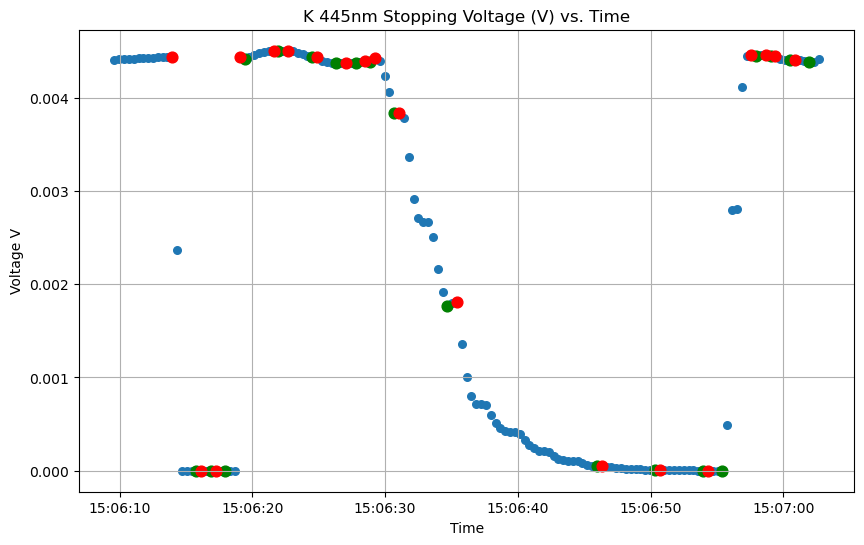

In [69]:
#K_445nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K_445nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')
plt.title('K 445nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()

In [71]:
maxstopping_K_445= 0.004503787

fullintensity_K_445=0.004442634

## K_635nm BAD DATA 


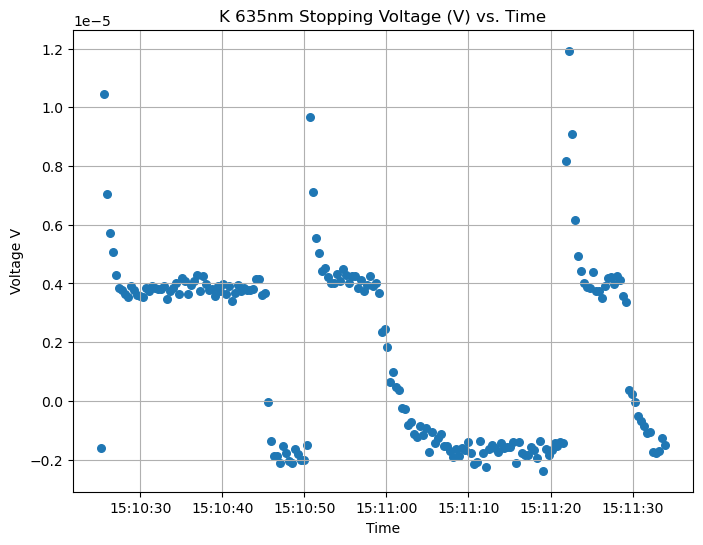

In [74]:
#K_635nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K_635nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=30)
plt.title('K 635nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


Local Minima:
Index: 9, X: 2025-04-30 15:10:28.505000, Y: 3.543e-06
Index: 14, X: 2025-04-30 15:10:30.322000, Y: 3.543e-06
Index: 16, X: 2025-04-30 15:10:31.048000, Y: 3.726e-06
Index: 19, X: 2025-04-30 15:10:32.139000, Y: 3.805e-06
Index: 22, X: 2025-04-30 15:10:33.229000, Y: 3.452e-06
Index: 26, X: 2025-04-30 15:10:34.682000, Y: 3.648e-06
Index: 29, X: 2025-04-30 15:10:35.773000, Y: 3.648e-06
Index: 33, X: 2025-04-30 15:10:37.228000, Y: 3.726e-06
Index: 36, X: 2025-04-30 15:10:38.318000, Y: 3.766e-06
Index: 38, X: 2025-04-30 15:10:39.045000, Y: 3.556e-06
Index: 40, X: 2025-04-30 15:10:39.771000, Y: 3.726e-06
Index: 42, X: 2025-04-30 15:10:40.499000, Y: 3.635e-06
Index: 44, X: 2025-04-30 15:10:41.225000, Y: 3.413e-06
Index: 47, X: 2025-04-30 15:10:42.316000, Y: 3.74e-06
Index: 54, X: 2025-04-30 15:10:44.859000, Y: 3.622e-06
Index: 60, X: 2025-04-30 15:10:47.041000, Y: -2.131e-06
Index: 64, X: 2025-04-30 15:10:48.496000, Y: -2.118e-06
Index: 67, X: 2025-04-30 15:10:49.586000, Y: -2.027

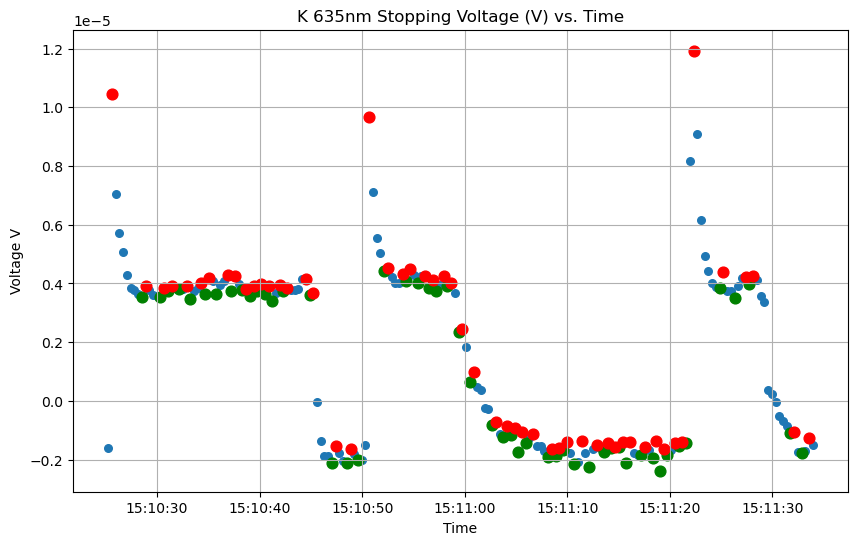

In [76]:
#K_635nm
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K_635nm.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]
min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')
plt.title('K 635nm Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


In [78]:
maxstopping_K_635= 4.511e-06

fullintensity_K_635=3.805e-06

## New K data

In [ ]:
K_445_IT3

Local Minima:
Index: 15, X: 2025-05-05 19:29:23.536000, Y: 0.023218331
Index: 22, X: 2025-05-05 19:29:26.121000, Y: 1.0649555
Index: 30, X: 2025-05-05 19:29:29.029000, Y: 1.0669943
Index: 80, X: 2025-05-05 19:29:47.358000, Y: 0.06010687
Index: 88, X: 2025-05-05 19:29:50.307000, Y: 1.0665283
Index: 109, X: 2025-05-05 19:29:57.940000, Y: 0.44651538

Local Maxima:
Index: 21, X: 2025-05-05 19:29:25.757000, Y: 1.0651156
Index: 29, X: 2025-05-05 19:29:28.666000, Y: 1.0670681
Index: 37, X: 2025-05-05 19:29:31.573000, Y: 1.067811
Index: 87, X: 2025-05-05 19:29:49.943000, Y: 1.0665726
Index: 89, X: 2025-05-05 19:29:50.670000, Y: 1.0668636
Index: 114, X: 2025-05-05 19:29:59.757000, Y: 1.0670336


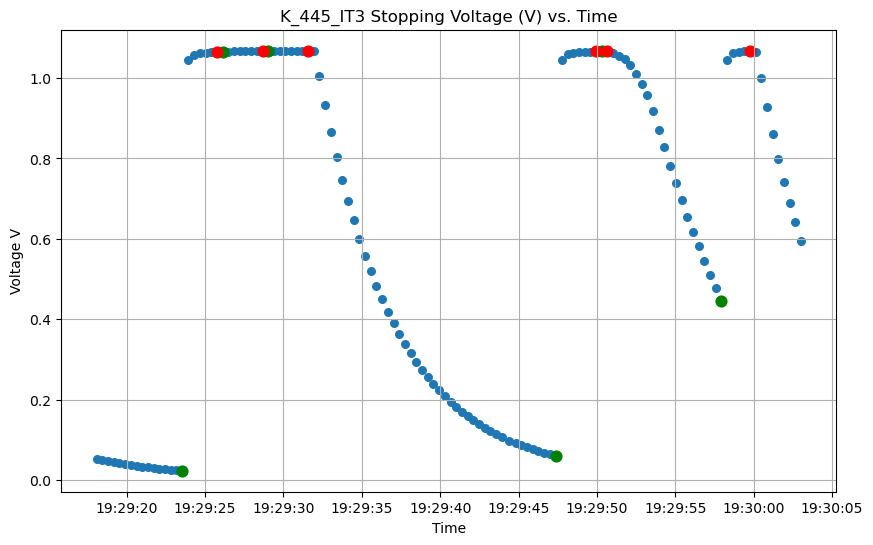

In [132]:
#K_445_IT3
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K_445_IT3.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]
min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')
plt.title('K_445_IT3 Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


In [143]:
maxstopping_K_445_I= 1.067811

fullintensity_K_445_I=1.0668636

Local Minima:
Index: 1, X: 2025-05-05 19:26:45.573000, Y: -0.00626204
Index: 5, X: 2025-05-05 19:26:47.027000, Y: -0.005621183
Index: 9, X: 2025-05-05 19:26:48.481000, Y: -0.005317785
Index: 13, X: 2025-05-05 19:26:49.935000, Y: -0.004832944
Index: 15, X: 2025-05-05 19:26:50.661000, Y: -0.004816051
Index: 24, X: 2025-05-05 19:26:54.023000, Y: 0.17298838
Index: 87, X: 2025-05-05 19:27:17.010000, Y: 0.010627258
Index: 134, X: 2025-05-05 19:27:34.224000, Y: 0.033806701

Local Maxima:
Index: 4, X: 2025-05-05 19:26:46.664000, Y: -0.005515182
Index: 7, X: 2025-05-05 19:26:47.754000, Y: -0.004733965
Index: 12, X: 2025-05-05 19:26:49.571000, Y: -0.004618367
Index: 14, X: 2025-05-05 19:26:50.298000, Y: -0.004772629
Index: 18, X: 2025-05-05 19:26:51.797000, Y: 0.2828051
Index: 46, X: 2025-05-05 19:27:02.019000, Y: 0.18691229
Index: 96, X: 2025-05-05 19:27:20.372000, Y: 0.1784376
Index: 139, X: 2025-05-05 19:27:36.164000, Y: 0.16911359


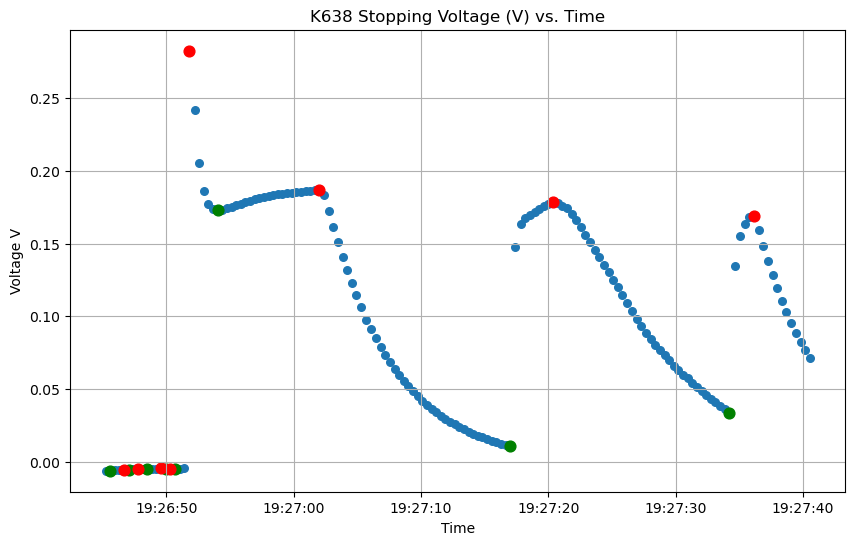

In [145]:
#K638
df = pd.read_excel('/Users/marieriddle/Desktop/PHY312/PhotoElectric/data/Voltage/K638.xlsx')

data = df.iloc[:, :2].values  # shape (n_rows, 2)

x = data[:, 0]
y = data[:, 1]
min_indices = argrelextrema(y, np.less)[0]
max_indices = argrelextrema(y, np.greater)[0]

print("Local Minima:")
for idx in min_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

print("\nLocal Maxima:")
for idx in max_indices:
    print(f"Index: {idx}, X: {x[idx]}, Y: {y[idx]}")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, label='Data')

plt.scatter(x[min_indices], y[min_indices], color='green', s=60, label='Local Minima')

plt.scatter(x[max_indices], y[max_indices], color='red', s=60, label='Local Maxima')
plt.title('K638 Stopping Voltage (V) vs. Time')
plt.xlabel('Time')
plt.ylabel('Voltage V')
plt.grid(True)
plt.show()


In [141]:
maxstopping_K_635_I= 0.18691229

fullintensity_K_635_I=0.18691229

## Stopping Voltage vs. wavelength plots  THIS IS ALL WRONG

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stopping_voltage_fit(*args, title='Stopping Voltage vs 1/Wavelength'):
 
    if len(args) % 2 != 0:
        raise ValueError("Please provide an even number of arguments: wavelength1, voltage1, wavelength2, voltage2, ...")
    
    data_points = np.array(args).reshape(-1, 2)
    wavelength_nm = data_points[:, 0]  # in nm
    stopping_voltage = data_points[:, 1]  # in V
    
    wavelength_m = wavelength_nm * 1e-9  # nm → m
    
    inv_wavelength_m = 1 / wavelength_m
    
    coeffs = np.polyfit(inv_wavelength_m, stopping_voltage, 1)
    slope_m, intercept = coeffs
    
    e_charge = 1.602e-19  # Coulombs
    c_light = 2.998e8     # m/s
    
    h_estimate = slope_m * e_charge / c_light
    W_estimate = intercept * e_charge
    
    inv_wavelength_nm = 1 / wavelength_nm
    
    slope_nm = slope_m * 1e9
    
    x_fit_nm = np.linspace(inv_wavelength_nm.min(), inv_wavelength_nm.max(), 100)
    x_fit_m = x_fit_nm * 1e9
    y_fit = slope_m * x_fit_m + intercept
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(inv_wavelength_nm, stopping_voltage, color='blue', label='Data Points')
    plt.plot(x_fit_nm, y_fit, color='red', label=f'Fit: V = {slope_nm:.3f}*(1/λ [1/nm]) + {intercept:.3f}')
    
    plt.title(title)
    plt.xlabel('1 / Wavelength (1/nm)')
    plt.ylabel('Stopping Voltage (V)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Best fit line: V = {slope_nm:.3f} * (1/λ [1/nm]) + {intercept:.3f} V")
    print(f"h = {h_estimate:.3e} J·s  (slope * e / c)")
    print(f"W = {W_estimate:.3e} J  (intercept * e)")


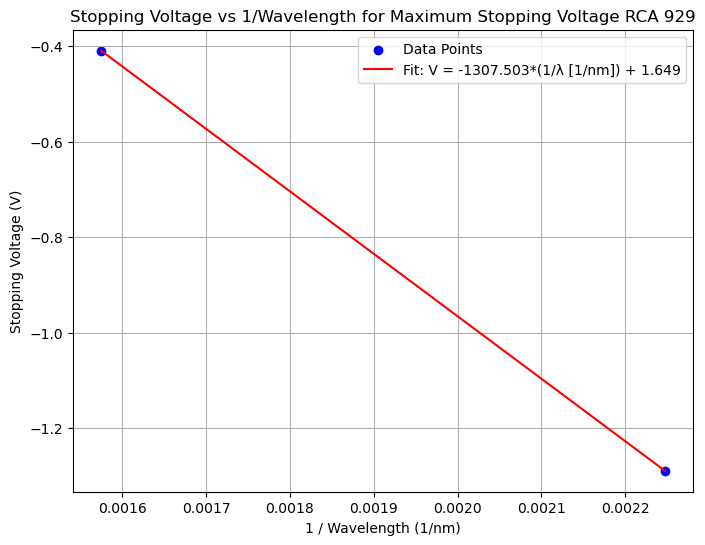

Best fit line: V = -1307.503 * (1/λ [1/nm]) + 1.649 V
h = -6.987e-34 J·s  (slope * e / c)
W = 2.642e-19 J  (intercept * e)


In [124]:
plot_stopping_voltage_fit(445,maxstopping_RCA_445,635,maxstopping_RCA_635, title='Stopping Voltage vs 1/Wavelength for Maximum Stopping Voltage RCA 929')

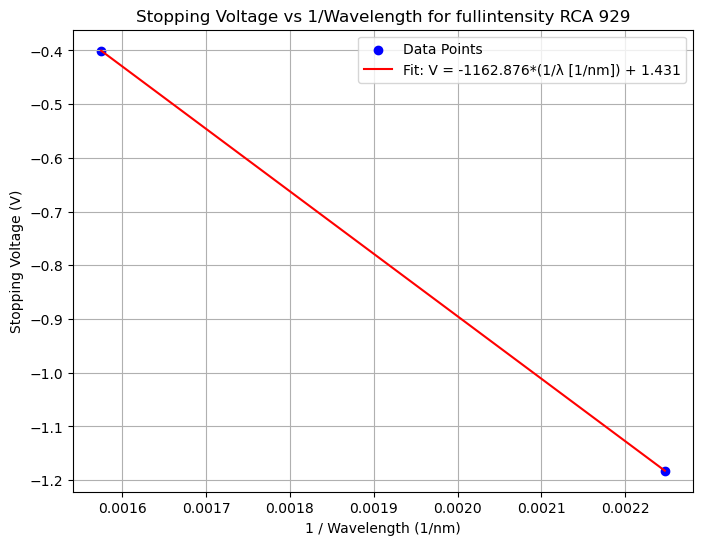

Best fit line: V = -1162.876 * (1/λ [1/nm]) + 1.431 V
h = -6.214e-34 J·s  (slope * e / c)
W = 2.292e-19 J  (intercept * e)


In [126]:
plot_stopping_voltage_fit(445,fullintensity_RCA_445,635,fullintensity_RCA_635, title='Stopping Voltage vs 1/Wavelength for fullintensity RCA 929')

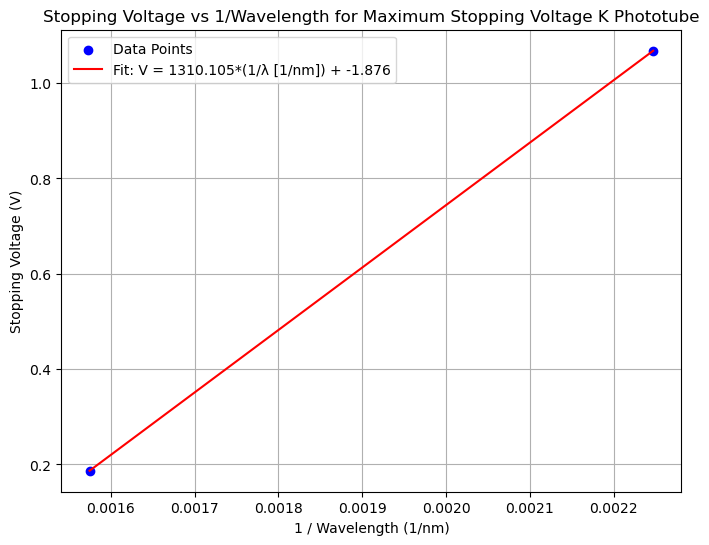

Best fit line: V = 1310.105 * (1/λ [1/nm]) + -1.876 V
h = 7.001e-34 J·s  (slope * e / c)
W = -3.006e-19 J  (intercept * e)


In [147]:
plot_stopping_voltage_fit(445,maxstopping_K_445_I,635,maxstopping_K_635_I, title='Stopping Voltage vs 1/Wavelength for Maximum Stopping Voltage K Phototube')

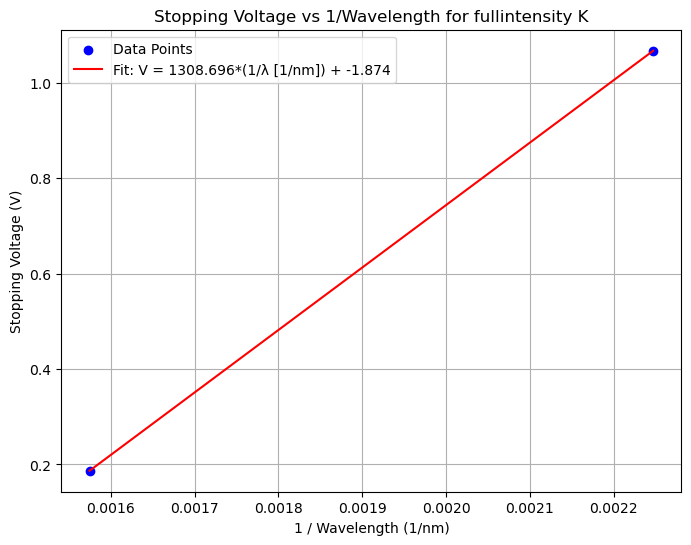

Best fit line: V = 1308.696 * (1/λ [1/nm]) + -1.874 V
h = 6.993e-34 J·s  (slope * e / c)
W = -3.002e-19 J  (intercept * e)


In [149]:
plot_stopping_voltage_fit(445,fullintensity_K_445_I,635,fullintensity_K_635_I, title='Stopping Voltage vs 1/Wavelength for fullintensity K')

In [151]:
import numpy as np

h_values = np.array([6.987e-34, 6.214e-34, 7.001e-34, 6.993e-34])
mean_h = np.mean(h_values)
std_h = np.std(h_values, ddof=1)  
sem_h = std_h / np.sqrt(len(h_values))

print(f"Mean h: {mean_h:.3e} ± {sem_h:.3e} J·s")


Mean h: 6.799e-34 ± 1.949e-35 J·s


In [157]:
##RCA
W_values = np.array([2.642e-19,2.292e-19])
mean_W = np.mean(W_values)
std_W = np.std(W_values, ddof=1)  
sem_W = std_W / np.sqrt(len(W_values))

print(f"Mean W: {mean_W:.3e} ± {sem_W:.3e} J")

Mean W: 2.467e-19 ± 1.750e-20 J


In [159]:
#K
W_values = np.array([3.006e-19,3.002e-19])
mean_W = np.mean(W_values)
std_W = np.std(W_values, ddof=1)
sem_W = std_W / np.sqrt(len(W_values))

print(f"Mean W: {mean_W:.3e} ± {sem_W:.3e} J")

Mean W: 3.004e-19 ± 2.000e-22 J


In [189]:

c = 3.0e8 
m_e = 9.11e-31  

h_measured = 6.799e-34  

lambda_440 = 440e-9  
lambda_635 = 635e-9 

W_rca = 2.467e-19  
W_k = 3.004e-19    

# Calculate velocities
v_440_rca = np.sqrt(2 * (h_measured * c / lambda_440 - W_rca) / m_e)
v_440_k = np.sqrt(2 * (h_measured * c / lambda_440 - W_k) / m_e)
v_635_rca = np.sqrt(2 * (h_measured * c / lambda_635 - W_rca) / m_e)
v_635_k = np.sqrt(2 * (h_measured * c / lambda_635 - W_k) / m_e)

# Output results
print(f"Estimated electron velocity for RCA photocathode (440 nm): {v_440_rca:.2e} m/s")
print(f"Estimated electron velocity for K photocathode (440 nm): {v_440_k:.2e} m/s")
print(f"Estimated electron velocity for RCA photocathode (635 nm): {v_635_rca:.2e} m/s")
print(f"Estimated electron velocity for K photocathode (635 nm): {v_635_k:.2e} m/s")


Estimated electron velocity for RCA photocathode (440 nm): 6.90e+05 m/s
Estimated electron velocity for K photocathode (440 nm): 5.99e+05 m/s
Estimated electron velocity for RCA photocathode (635 nm): 4.04e+05 m/s
Estimated electron velocity for K photocathode (635 nm): 2.14e+05 m/s


In [187]:
-2.68415000e-06/((12.45159)*6.90e+05)

-3.1241572070459406e-13